In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('stock-data/GOOG.csv')
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.set_index(["Date"],inplace=True)
df = df.fillna('ffill')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-06-20,137.529510,143.297882,135.357651,142.814697,142.814697,42206900
2005-06-21,143.497131,144.607971,141.952927,143.382568,143.382568,30377900
2005-06-22,144.294144,145.614197,143.796021,144.109848,144.109848,21026400
2005-06-23,143.462265,146.854553,142.715073,144.314072,144.314072,28218100
2005-06-24,144.906860,148.443604,144.249313,148.069992,148.069992,35675500


## The ACF

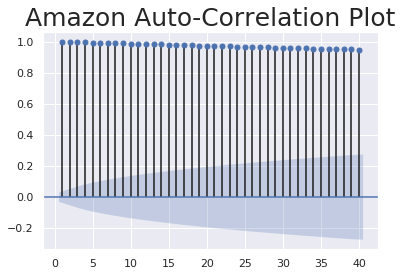

In [3]:
sgt.plot_acf(df['Close'].tolist(),zero=False,lags=40)
plt.title("Amazon Auto-Correlation Plot",size=25)
plt.show()

## The PACF

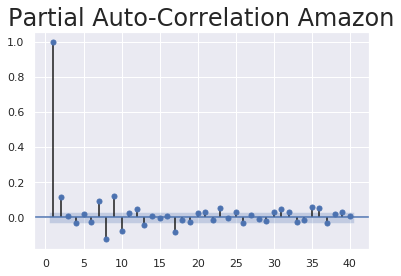

In [4]:
sgt.plot_pacf(df['Close'].tolist(),lags=40 ,zero=False,method= ('ols')) # ols = orders of least squared
plt.title("Partial Auto-Correlation Amazon",size=24)
plt.show()

## The AR(1) Model

In [25]:
model_ar_1 = ARMA(df['Close'],order=(1,0))
result_ar_1 = model_ar_1.fit()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [26]:
result_ar_1.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/home/mohsin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/mohsin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/mohsin/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3776
Model:                     ARMA(1, 0)   Log Likelihood              -14479.844
Method:                       css-mle   S.D. of innovations             11.170
Date:                Sat, 27 Jun 2020   AIC                          28965.689
Time:                        11:15:11   BIC                          28984.398
Sample:                             0   HQIC                         28972.340
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         538.8450        nan        nan        nan         nan         nan
ar.L1.Close     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

## Higher Lag

In [7]:
model_ar_2 = ARMA(df['Close'],order=(2,0))
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3777
Model:                     ARMA(2, 0)   Log Likelihood              -14452.803
Method:                       css-mle   S.D. of innovations             11.095
Date:                Sat, 27 Jun 2020   AIC                          28913.605
Time:                        11:01:53   BIC                          28938.552
Sample:                             0   HQIC                         28922.474
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         539.1693    606.920      0.888      0.374    -650.373    1728.711
ar.L1.Close     0.8849      0.004    204.894      0.000       0.876       0.893
ar.L2.Close     0.1150      0.004     26.618      0.000       0.107       0.123
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
AR.2           -8.6965           +0.0000j            8.6965            0.5000
-----------------------------------------------------------------------------
"""

In [8]:
model_ar_3 = ARMA(df['Close'],order=(3,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3777
Model:                     ARMA(3, 0)   Log Likelihood              -14452.705
Method:                       css-mle   S.D. of innovations             11.095
Date:                Sat, 27 Jun 2020   AIC                          28915.410
Time:                        11:01:55   BIC                          28946.594
Sample:                             0   HQIC                         28926.496
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         711.5735    504.728      1.410      0.159    -277.676    1700.823
ar.L1.Close     0.8844      0.005    174.157      0.000       0.874       0.894
ar.L2.Close     0.1116      0.017      6.738      0.000       0.079       0.144
ar.L3.Close     0.0038      0.016      0.240      0.810      -0.027       0.035
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2          -15.0560           -5.8466j           16.1513           -0.4410
AR.3          -15.0560           +5.8466j           16.1513            0.4410
-----------------------------------------------------------------------------
"""

## Log Likely hood test (LLRT)

In [9]:
def LLR_test(model_1,model_2,DF=1): # DF = Degree of Freedom
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2 * (L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

## Comparing higher Lag AR Model

In [10]:
model_ar_2 = ARMA(df['Close'],order=(2,0))
model_ar_3 = ARMA(df['Close'],order=(3,0))
LLR_test(model_ar_2,model_ar_3)

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0.659

## Dicky Fuller Test

In [11]:
sts.adfuller(df['Close'])

(0.6674694186181261,
 0.9891657980289273,
 30,
 3746,
 {'1%': -3.4320968731198844,
  '5%': -2.8623118721638185,
  '10%': -2.5671808782345233},
 28482.92222267491)

In [12]:
df['Returns'] = df['Close'].pct_change(1).mul(100)
df = df[1:]
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2005-06-21,143.497131,144.607971,141.952927,143.382568,143.382568,30377900,0.397628
2005-06-22,144.294144,145.614197,143.796021,144.109848,144.109848,21026400,0.507230
2005-06-23,143.462265,146.854553,142.715073,144.314072,144.314072,28218100,0.141714
2005-06-24,144.906860,148.443604,144.249313,148.069992,148.069992,35675500,2.602601
2005-06-27,148.891922,151.666519,146.381332,151.482208,151.482208,35739200,2.304462


In [13]:
sts.adfuller(df['Returns'])

(-63.975436501053956,
 0.0,
 0,
 3775,
 {'1%': -3.432083444290468,
  '5%': -2.8623059402381736,
  '10%': -2.5671777202929698},
 15317.624886956635)

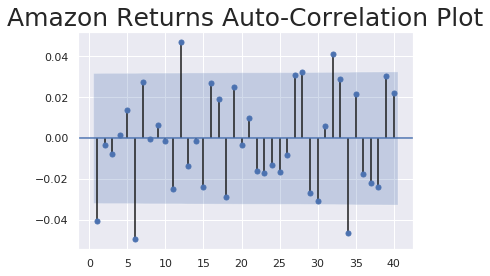

In [14]:
sgt.plot_acf(df['Returns'].tolist(),zero=False,lags=40)
plt.title("Amazon Returns Auto-Correlation Plot",size=25)
plt.show()

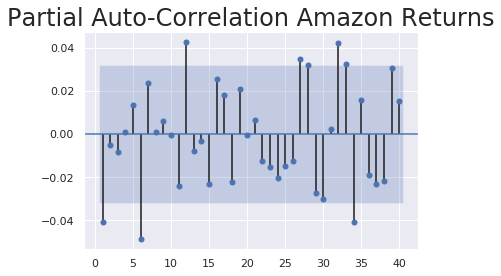

In [15]:
sgt.plot_pacf(df['Returns'].tolist(),lags=40 ,zero=False,method= ('ols')) # ols = orders of least squared
plt.title("Partial Auto-Correlation Amazon Returns",size=24)
plt.show()

In [16]:
model_ar_returns_1 = ARMA(df['Returns'],order=(1,0))
result_ar_returns_1 = model_ar_returns_1.fit()
result_ar_returns_1.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 3776
Model:                     ARMA(1, 0)   Log Likelihood               -7716.620
Method:                       css-mle   S.D. of innovations              1.868
Date:                Sat, 27 Jun 2020   AIC                          15439.239
Time:                        11:02:00   BIC                          15457.949
Sample:                             0   HQIC                         15445.891
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0784      0.029      2.684      0.007       0.021       0.136
ar.L1.Returns    -0.0407      0.016     -2.501      0.012      -0.073      -0.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -24.5973           +0.0000j           24.5973            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
model_ar_returns_2 = ARMA(df['Returns'],order=(2,0))
result_ar_returns_2 = model_ar_returns_2.fit()
result_ar_returns_2.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 3776
Model:                     ARMA(2, 0)   Log Likelihood               -7716.570
Method:                       css-mle   S.D. of innovations              1.868
Date:                Sat, 27 Jun 2020   AIC                          15441.141
Time:                        11:02:00   BIC                          15466.086
Sample:                             0   HQIC                         15450.009
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0784      0.029      2.698      0.007       0.021       0.135
ar.L1.Returns    -0.0409      0.016     -2.511      0.012      -0.073      -0.009
ar.L2.Returns    -0.0051      0.016     -0.314      0.753      -0.037       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.9937          -13.3985j           13.9810           -0.2961
AR.2           -3.9937          +13.3985j           13.9810            0.2961
-----------------------------------------------------------------------------
"""

In [18]:
model_ar_returns_1 = ARMA(df['Returns'],order=(1,0))
model_ar_returns_2 = ARMA(df['Returns'],order=(2,0))
LLR_test(model_ar_returns_1,model_ar_returns_2)

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0.753

In [19]:
model_ar_returns_3 = ARMA(df['Returns'],order=(3,0))
result_ar_returns_3 = model_ar_returns_3.fit()
result_ar_returns_3.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 3776
Model:                     ARMA(3, 0)   Log Likelihood               -7716.445
Method:                       css-mle   S.D. of innovations              1.868
Date:                Sat, 27 Jun 2020   AIC                          15442.890
Time:                        11:02:00   BIC                          15474.072
Sample:                             0   HQIC                         15453.976
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0784      0.029      2.720      0.007       0.022       0.135
ar.L1.Returns    -0.0409      0.016     -2.514      0.012      -0.073      -0.009
ar.L2.Returns    -0.0054      0.016     -0.335      0.738      -0.037       0.026
ar.L3.Returns    -0.0081      0.016     -0.501      0.617      -0.040       0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.8512           -0.0000j            4.8512           -0.5000
AR.2            2.0911           -4.5759j            5.0311           -0.1818
AR.3            2.0911           +4.5759j            5.0311            0.1818
-----------------------------------------------------------------------------
"""

In [20]:
model_ar_returns_2 = ARMA(df['Returns'],order=(2,0))
model_ar_returns_3 = ARMA(df['Returns'],order=(3,0))
LLR_test(model_ar_returns_2,model_ar_returns_3)

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0.617

## Normalizing the values

In [21]:
benchmark = df['Close'].iloc[0]
df['norm'] = df['Close'].div(benchmark).mul(100)
sts.adfuller(df.norm)

(0.6657345638504828,
 0.9891286412215099,
 30,
 3745,
 {'1%': -3.432097339894967,
  '5%': -2.862312078352202,
  '10%': -2.567180988001804},
 25777.33531702006)

## Normalizing the Returns

In [22]:
benchmark = df['Returns'].iloc[0]
df['r_norm'] = df['Returns'].div(benchmark).mul(100)
sts.adfuller(df.r_norm)

(-63.975436501053984,
 0.0,
 0,
 3775,
 {'1%': -3.432083444290468,
  '5%': -2.8623059402381736,
  '10%': -2.5671777202929698},
 56717.91802363671)

## Fitting the ARMA on Return Normalized

In [23]:
model_r_norm_ar_1 = ARMA(df.r_norm, order=(1,0))
results_r_norm_ar_1 = model_r_norm_ar_1.fit()
results_r_norm_ar_1.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 r_norm   No. Observations:                 3776
Model:                     ARMA(1, 0)   Log Likelihood              -28588.116
Method:                       css-mle   S.D. of innovations            469.687
Date:                Sat, 27 Jun 2020   AIC                          57182.232
Time:                        11:08:58   BIC                          57200.941
Sample:                             0   HQIC                         57188.883
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           19.7171      7.345      2.684      0.007       5.321      34.113
ar.L1.r_norm    -0.0407      0.016     -2.501      0.012      -0.073      -0.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -24.5972           +0.0000j           24.5972            0.5000
-----------------------------------------------------------------------------
"""

In [24]:
model_r_norm_ar_2 = ARMA(df.r_norm, order=(2,0))
results_r_norm_ar_2 = model_r_norm_ar_2.fit()
results_r_norm_ar_2.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 r_norm   No. Observations:                 3776
Model:                     ARMA(2, 0)   Log Likelihood              -28588.067
Method:                       css-mle   S.D. of innovations            469.681
Date:                Sat, 27 Jun 2020   AIC                          57184.133
Time:                        11:10:01   BIC                          57209.079
Sample:                             0   HQIC                         57193.002
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           19.7171      7.308      2.698      0.007       5.395      34.040
ar.L1.r_norm    -0.0409      0.016     -2.511      0.012      -0.073      -0.009
ar.L2.r_norm    -0.0051      0.016     -0.314      0.753      -0.037       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.9938          -13.3986j           13.9812           -0.2961
AR.2           -3.9938          +13.3986j           13.9812            0.2961
-----------------------------------------------------------------------------
"""

## Analysing the residuals of the model

In [29]:
df['res_price'] = result_ar_1.resid
df.res_price.mean()

0.23646052423832867

In [30]:
df.res_price.var()

166.17013945266996

In [32]:
sts.adfuller(df.res_price)

(-11.863379565809117,
 6.763998296927738e-22,
 30,
 3745,
 {'1%': -3.432097339894967,
  '5%': -2.862312078352202,
  '10%': -2.567180988001804},
 28474.74654026829)

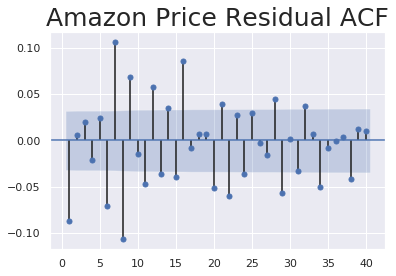

In [33]:
sgt.plot_acf(df.res_price,zero=False,lags=40)
plt.title("Amazon Price Residual ACF",size=25)
plt.show()

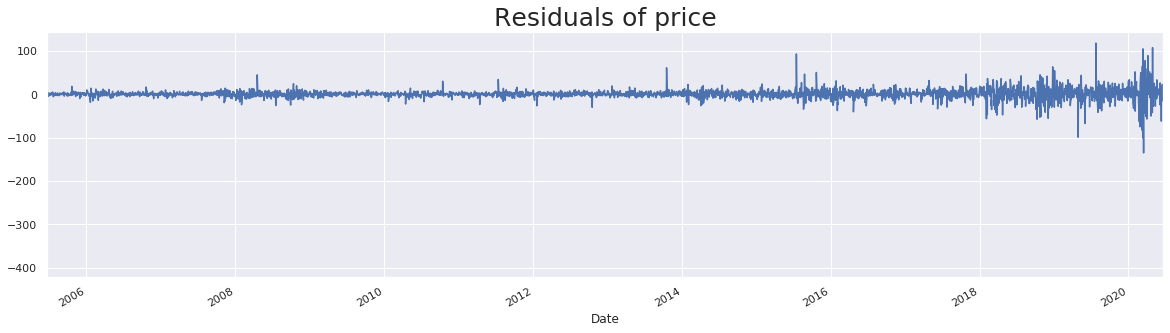

In [34]:
df.res_price.plot(figsize=(20,5))
plt.title("Residuals of price",size=25)
plt.show()